In [2]:
!pip install pydataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 69.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939416 sha256=e3b87288207bf6d34f32f111d1924b50535d557f52e97b6fd436837cb2c47863
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pydataset import data

from sklearn import svm
from sklearn import model_selection
from statsmodels.tools import eval_measures
from statsmodels.tools.eval_measures import mse

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score,classification_report
%matplotlib inline
import warnings; 
warnings.simplefilter('ignore')

In [15]:
df = pd.DataFrame(data('OFP'))
df.head(2)

,ofp,ofnp,opp,opnp,emr,hosp,numchron,adldiff,age,black,sex,maried,school,faminc,employed,privins,medicaid,region,hlth
1,5,0,0,0,0,1,2,0,6.9,yes,male,yes,6,2.8810,yes,yes,no,other,other
2,1,0,2,0,2,0,2,0,7.4,no,female,yes,10,2.7478,no,yes,no,other,other


In [16]:
# df.dropna()

In [17]:
label_encoder= LabelEncoder()

df['Black']= label_encoder.fit_transform(df['black'])
df['Sex']= label_encoder.fit_transform(df['sex'])
df['Maried']= label_encoder.fit_transform(df['maried'])
df['Employed']= label_encoder.fit_transform(df['employed'])

In [18]:
df.head(2)

,ofp,ofnp,opp,opnp,emr,hosp,numchron,adldiff,age,black,...,faminc,employed,privins,medicaid,region,hlth,Black,Sex,Maried,Employed
1,5,0,0,0,0,1,2,0,6.9,yes,...,2.8810,yes,yes,no,other,other,1,1,1,1
2,1,0,2,0,2,0,2,0,7.4,no,...,2.7478,no,yes,no,other,other,0,0,1,0


In [19]:
df.columns

Index(['ofp', 'ofnp', 'opp', 'opnp', 'emr', 'hosp', 'numchron', 'adldiff',
       'age', 'black', 'sex', 'maried', 'school', 'faminc', 'employed',
       'privins', 'medicaid', 'region', 'hlth', 'Black', 'Sex', 'Maried',
       'Employed'],
      dtype='object')

In [20]:
df=df.drop(['black', 'sex', 'maried', 'employed','privins', 'medicaid', 'region', 'hlth'], axis=1)

df.head(2)

,ofp,ofnp,opp,opnp,emr,hosp,numchron,adldiff,age,school,faminc,Black,Sex,Maried,Employed
1,5,0,0,0,0,1,2,0,6.9,6,2.8810,1,1,1,1
2,1,0,2,0,2,0,2,0,7.4,10,2.7478,0,0,1,0


### Scaling

In [21]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the variable(s)
scaled_data = scaler.fit_transform(df)

# Update the original DataFrame with scaled values
df.loc[:, :] = scaled_data
df.head(3)

,ofp,ofnp,opp,opnp,emr,hosp,numchron,adldiff,age,school,faminc,Black,Sex,Maried,Employed
1,0.056180,0.0,0.000000,0.0,0.000000,0.125,0.25,0.0,0.069767,0.333333,0.069717,1.0,1.0,1.0,1.0
2,0.011236,0.0,0.014184,0.0,0.166667,0.000,0.25,0.0,0.186047,0.555556,0.067331,0.0,0.0,1.0,0.0
3,0.146067,0.0,0.000000,0.0,0.250000,0.375,0.50,1.0,0.000000,0.555556,0.029826,1.0,0.0,0.0,0.0


## Models


In [22]:
df.columns

Index(['ofp', 'ofnp', 'opp', 'opnp', 'emr', 'hosp', 'numchron', 'adldiff',
       'age', 'school', 'faminc', 'Black', 'Sex', 'Maried', 'Employed'],
      dtype='object')

In [23]:
# Creating Independent Variable
X = df[['ofp', 'ofnp', 'opp', 'opnp', 'emr', 'hosp', 'numchron', 'adldiff',
       'age', 'school', 'Black', 'Sex', 'Maried', 'Employed']]
y = df[ 'faminc']

In [24]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.25,random_state=1)

In [25]:
# Support Vector Regression
model = svm.SVR()

In [26]:
model.fit(X_train,y_train)

SVR()

In [34]:
y_pred=model.predict(X_test)

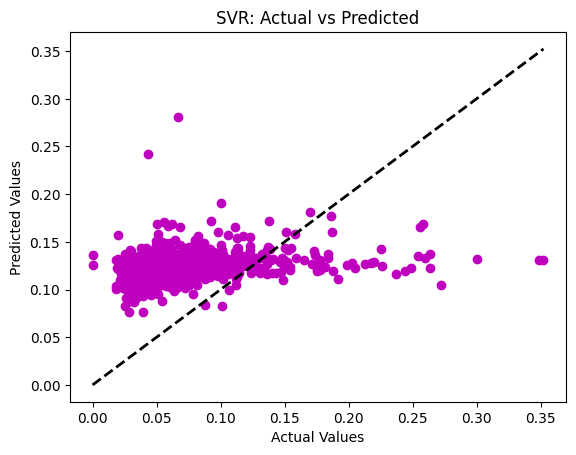

In [47]:
# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred,c= 'm')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR: Actual vs Predicted')
plt.savefig('SVR_Actual_vs_Predicted.png')

In [48]:
mse(ypred,y_test)

0.0054907669845351

In [49]:
eval_measures.rmse(ypred,y_test)

0.07409970974663194

In [50]:

eval_measures.bias(ypred,y_test)


0.062227072970656515

In [51]:
eval_measures.rmspe(ypred,y_test)

6.022130011843898

In [52]:
eval_measures.vare(ypred,y_test)

0.0016185583740396885